In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [3]:
# the data column is already in datatime format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


### 1.  Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


<AxesSubplot:xlabel='date'>

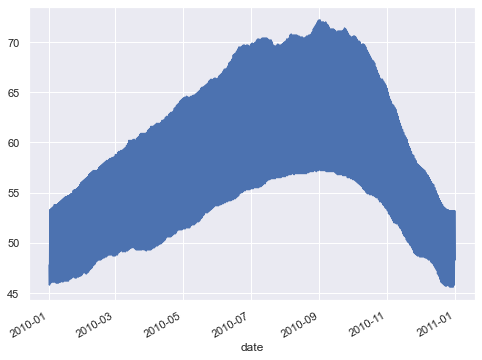

In [5]:
df.temp.plot()

In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


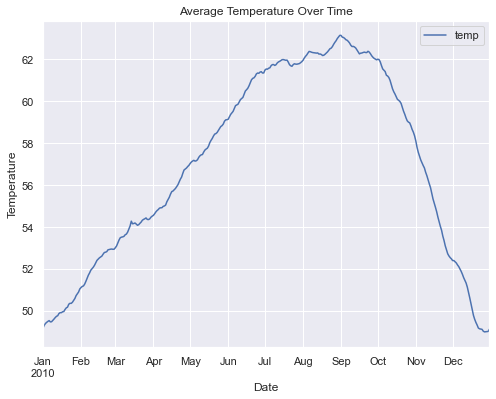

In [7]:
df.resample('D').mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

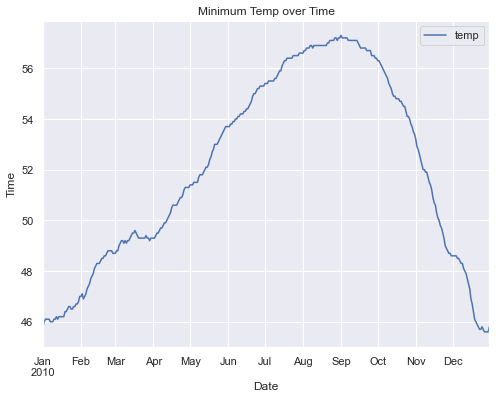

In [8]:
df.resample('D').min().plot()
plt.title('Minimum Temp over Time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

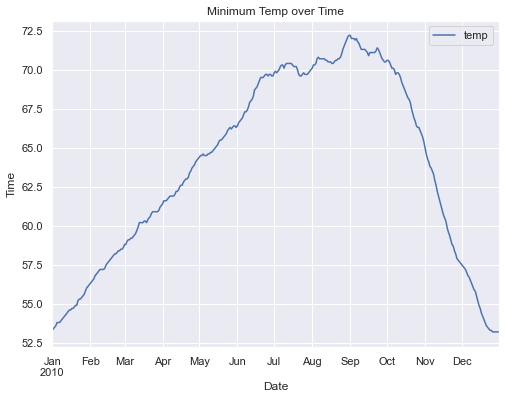

In [9]:
df.resample('D').max().plot()
plt.title('Minimum Temp over Time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()

### 4. Which month is the coldest, on average?

In [10]:
df.resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98


In [11]:
# or
df.resample('M').mean().temp.sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

### 5. Which month has the highest average temperature?

In [12]:
df.resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.49


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [13]:
sf_df = df.temp.resample('D').agg(['min', 'max'])

In [14]:
sf_df

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


In [17]:
sf_df['temp_diff'] = sf_df['max'] - sf_df['min']

In [18]:
sf_df

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70
...,...,...,...
2010-12-27,45.60,53.20,7.60
2010-12-28,45.60,53.20,7.60
2010-12-29,45.60,53.20,7.60


In [19]:
# Which month has the highest daily temperature variability?

sf_df.resample('M').max().temp_diff.sort_values()

date
2010-12-31    8.90
2010-01-31    9.30
2010-02-28    9.90
2010-11-30   11.80
2010-03-31   12.00
2010-04-30   13.00
2010-05-31   13.10
2010-10-31   14.40
2010-06-30   14.80
2010-07-31   14.80
2010-09-30   14.90
2010-08-31   15.00
Name: temp_diff, dtype: float64

In [ ]:
# August

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<function matplotlib.pyplot.show(close=None, block=None)>

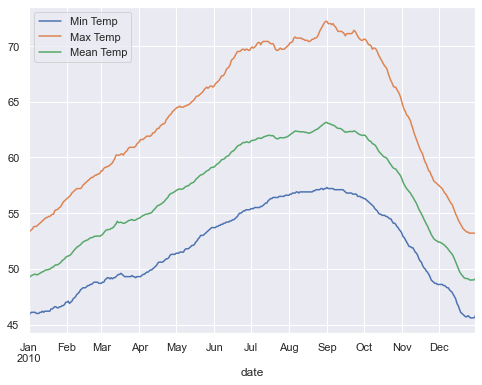

In [18]:
#sf_df.plot(label = 'raw data')
df.resample('D').min().temp.plot(label = 'Min Temp')
df.resample('D').max().temp.plot(label = 'Max Temp')
df.resample('D').mean().temp.plot(label = 'Mean Temp')
plt.legend()
plt.show

In [19]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


In [20]:
seattle_df = data.seattle_weather()

In [21]:
seattle = seattle_df.set_index('date').sort_index()
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog
2015-12-28,1.50,5.00,1.70,1.30,fog
2015-12-29,0.00,7.20,0.60,2.60,fog


In [22]:
seattle.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

###  1. Which year and month combination has the highest amount of precipitation?

In [23]:
seattle.resample('M').sum().precipitation.sort_values().tail(5)

date
2012-03-31   183.00
2012-11-30   210.50
2015-11-30   212.60
2014-03-31   240.00
2015-12-31   284.50
Name: precipitation, dtype: float64

### 2. Visualize the amount of monthly precipitation over time.

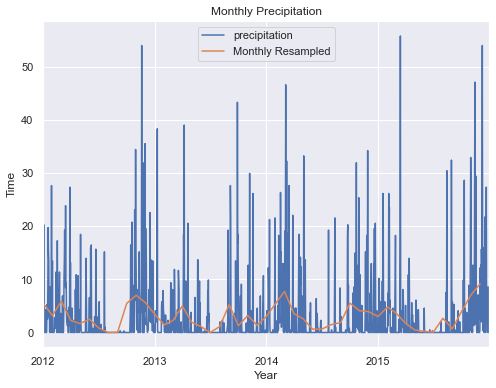

In [24]:
seattle.precipitation.plot()
seattle.resample('M').mean().precipitation.plot(label = 'Monthly Resampled')
plt.title('Monthly Precipitation')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

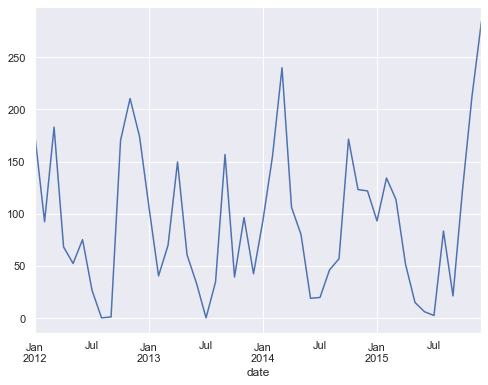

In [25]:
# or
seattle.precipitation.resample('M').sum().plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

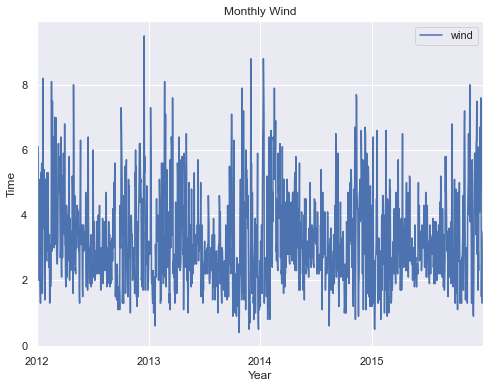

In [26]:
seattle.wind.plot()
# seattle.resample('D').mean().wind.plot(label = 'Monthly Amount of Wind')
plt.title('Monthly Wind')
plt.xlabel('Year')
plt.ylabel('Time')
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

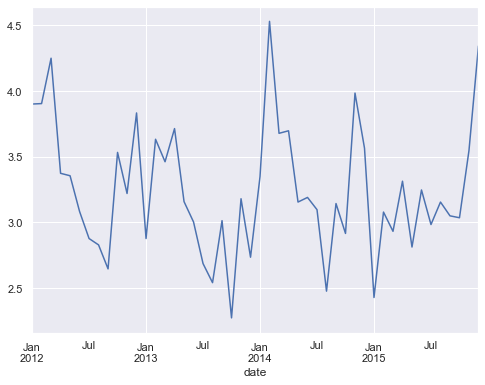

In [27]:
# or
seattle.wind.resample('M').mean().plot()

### 4. Which year-month combination is the windiest?

In [28]:
seattle.wind.resample('M').mean().sort_values().tail(5)

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [29]:
seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [30]:
seattle['is_sunny'] = seattle.weather == 'sun'

In [31]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False
2012-01-03,0.80,11.70,7.20,2.30,rain,False
2012-01-04,20.30,12.20,5.60,4.70,rain,False
2012-01-05,1.30,8.90,2.80,6.10,rain,False


In [32]:
seattle.resample('Y').is_sunny.mean()

date
2012-12-31   0.32
2013-12-31   0.56
2014-12-31   0.58
2015-12-31   0.49
Freq: A-DEC, Name: is_sunny, dtype: float64

### 6. In which month does it rain the most?

In [33]:
seattle['month'] = seattle.index.month

In [34]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1


In [35]:
seattle.groupby('month').precipitation.sum()

month
1    466.00
2    422.00
3    606.20
4    375.40
5    207.50
6    132.90
7     48.20
8    163.70
9    235.50
10   503.40
11   642.50
12   622.70
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [36]:
# did it rain?
seattle['did_rain'] = seattle.precipitation > 0

In [37]:
seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,did_rain
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,False,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,False,1,True
2012-01-03,0.80,11.70,7.20,2.30,rain,False,1,True
2012-01-04,20.30,12.20,5.60,4.70,rain,False,1,True
2012-01-05,1.30,8.90,2.80,6.10,rain,False,1,True


In [38]:
seattle.groupby('month').did_rain.mean().sort_values().tail(5)

month
1    0.53
3    0.59
11   0.59
2    0.65
12   0.65
Name: did_rain, dtype: float64

### Flights_20k

In [40]:
# how many observations?

df.shape

(20000, 4)

In [41]:
# what time period the data span:

df.index.min(), df.index.max()

(Timestamp('2001-01-01 00:01:00'), Timestamp('2001-03-31 21:30:00'))

- Convert any negative delays to 0.
- Which hour of the day has the highest average delay?
- Does the day of the week make a difference in the delay amount?
- Does the month make a difference in the delay amount?

### 1. Convert any negative delays to 0.

In [42]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [43]:
# use the function (.apply)

%timeit df.delay = df.delay.apply(delay_to_zero)

4.85 ms ± 16.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
# another method (np.where). Much faster if you have large dataset

%timeit df.delay = np.where(df.delay < 0, 0, df.delay)

200 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [45]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


### 2. Which hour of the day has the highest average delay?

In [46]:
df['hour'] = df.index.hour

df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [47]:
# groupby 'hour' and look at the mean delay:

df.groupby('hour').delay.mean().sort_values().tail(5)

hour
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

In [48]:
# Does the day of the week make a difference in the delay amount?
# make a new column 'week_day'

df['week_day'] = df.index.day_name()

In [49]:
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


### 3. Does the day of the week make a difference in the delay amount?

In [50]:
df['week_day'] = df.index.day_name()

In [51]:
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [52]:
# groupby the weekday and find mean delay:

df.groupby('week_day').delay.mean()

week_day
Friday      17.76
Monday       7.17
Saturday     8.43
Sunday      10.41
Thursday    12.82
Tuesday      9.41
Wednesday   11.03
Name: delay, dtype: float64

### 4. Does the month make a difference in the delay amount?

In [53]:
df['month'] = df.index.month
df.groupby('month').delay.mean()

month
1   11.30
2   12.31
3    9.88
Name: delay, dtype: float64